In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers.legacy import Adam
from keras.regularizers import l2
from keras.utils import np_utils
%matplotlib inline
tf.random.set_seed(3737)

In [2]:
# Load augmented dataset
train_ds = tf.data.Dataset.load('..\datasets\\augmented_train_ds')
validation_ds = tf.data.Dataset.load('..\datasets\\augmented_validation_ds')

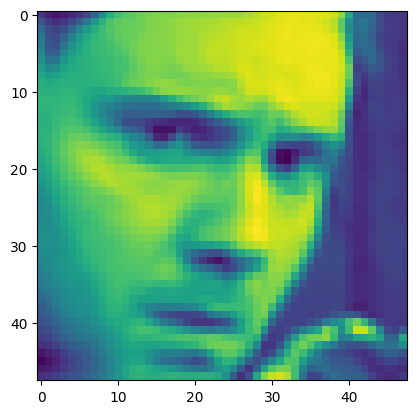

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

In [4]:
# Check an image sample
img, label = next(train_ds.as_numpy_iterator())
plt.imshow(img[0])
plt.show()
print(label)
print(img)

#### CNN Model

In [5]:
# Initialising the CNN
model = Sequential()
# 1 - Convolution Block
model.add(Conv2D(128,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution Block
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution Block
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution Block
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# 1st Dense Block
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# 2nd Dense Block
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

# Compile model with adam optimizer
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       2

In [6]:
# Training model
history = model.fit(train_ds,
          batch_size=64,
          epochs=15,
          verbose=1,
          validation_data=(validation_ds),
          shuffle=True)


Epoch 1/15
1118/1118 [==============================] - 79s 65ms/step - loss: 1.7600 - accuracy: 0.3308 - val_loss: 1.6522 - val_accuracy: 0.3698
Epoch 2/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.5362 - accuracy: 0.4230 - val_loss: 1.5530 - val_accuracy: 0.4187
Epoch 3/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.3984 - accuracy: 0.4736 - val_loss: 1.4421 - val_accuracy: 0.4482
Epoch 4/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.2946 - accuracy: 0.5156 - val_loss: 1.3058 - val_accuracy: 0.4977
Epoch 5/15
1118/1118 [==============================] - 71s 63ms/step - loss: 1.2217 - accuracy: 0.5438 - val_loss: 1.2349 - val_accuracy: 0.5297
Epoch 6/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.1625 - accuracy: 0.5681 - val_loss: 1.2243 - val_accuracy: 0.5390
Epoch 7/15
1118/1118 [==============================] - 71s 64ms/step - loss: 1.1196 - accuracy: 0.5869 - val_loss: 1.1781 -

In [7]:
# Calculate test loss
loss = model.evaluate(validation_ds)
print('Test loss:', loss)

114/114 [==============================] - 2s 17ms/step - loss: 1.1536 - accuracy: 0.5797
Test loss: [1.1536271572113037, 0.5797440409660339]


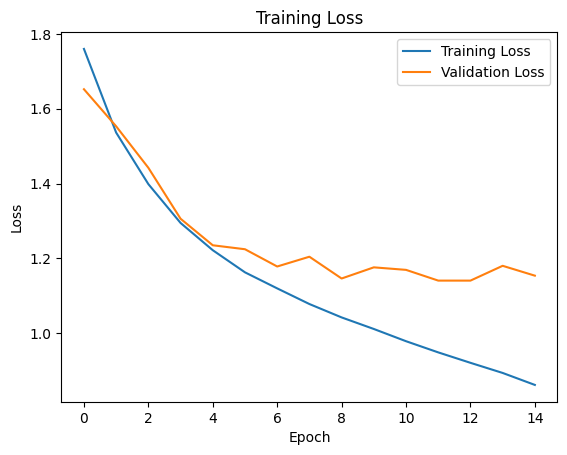

In [12]:
# plot the training loss graph
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

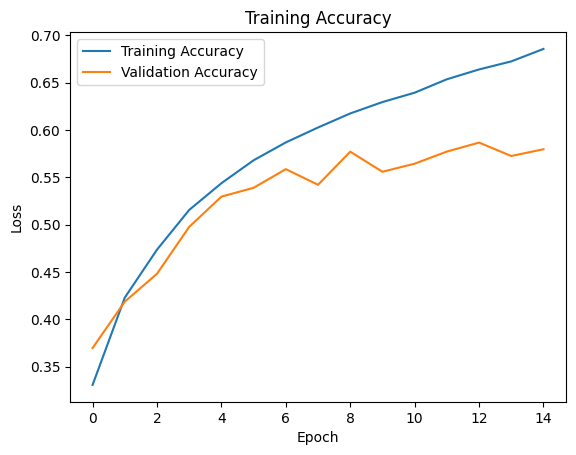

In [15]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

#### Evaluation

114/114 [==============================] - 2s 15ms/step
Confusion Matrix:
[[ 572    6   40   22  152   12  134]
 [  46   46    0    0   16    0   10]
 [ 182    0  290   17  272   48  185]
 [ 114    0   56 1272  104   16  235]
 [ 195    0   94   40  664    2  314]
 [  71    0  107   38   32  494   96]
 [ 106    2   38   38  208    6  875]]

Classification Report:
{'angry': {'precision': 0.4447900466562986, 'recall': 0.6098081023454158, 'f1-score': 0.5143884892086331, 'support': 938}, 'disgust': {'precision': 0.8518518518518519, 'recall': 0.3898305084745763, 'f1-score': 0.5348837209302325, 'support': 118}, 'fear': {'precision': 0.464, 'recall': 0.2917505030181087, 'f1-score': 0.3582458307597283, 'support': 994}, 'happy': {'precision': 0.8913805185704274, 'recall': 0.7078464106844741, 'f1-score': 0.7890818858560793, 'support': 1797}, 'neutral': {'precision': 0.4585635359116022, 'recall': 0.5072574484339191, 'f1-score': 0.4816829887558941, 'support': 1309}, 'sad': {'precision': 0.854671280

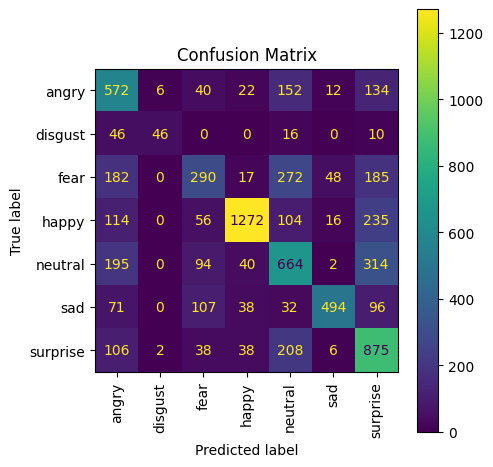

Class-wise Metrics:
angry Accuracy: 0.4448
disgust Accuracy: 0.8519
fear Accuracy: 0.4640
happy Accuracy: 0.8914
neutral Accuracy: 0.4586
sad Accuracy: 0.8547
surprise Accuracy: 0.4732


In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from keras.models import model_from_json
import numpy as np

model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Use the model to predict probabilities for each class
y_pred_probs = model.predict(validation_ds)

# Convert the probabilities to class labels (using the highest probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true class labels from the validation dataset (convert one-hot encoded labels to integers)
y_true = np.concatenate([np.argmax(y, axis=1) for x, y in validation_ds], axis=0)


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Compute the classification report
# class_report = classification_report(y_true, y_pred, target_names=emotions) # Replace 'class_names' with the list of your class names
# Compute the classification report
class_report = classification_report(y_true, y_pred, target_names=emotions, output_dict=True)


print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=emotions)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax, xticks_rotation='vertical', cmap='viridis')

# Customize the plot (optional)
ax.set_title("Confusion Matrix")
plt.tight_layout()

# Show the plot
plt.show()

# Print class-wise metrics
print("Class-wise Metrics:")
for emotion in emotions:
    acc = class_report[emotion]['precision']
    print(f"{emotion} Accuracy: {acc:.4f}")

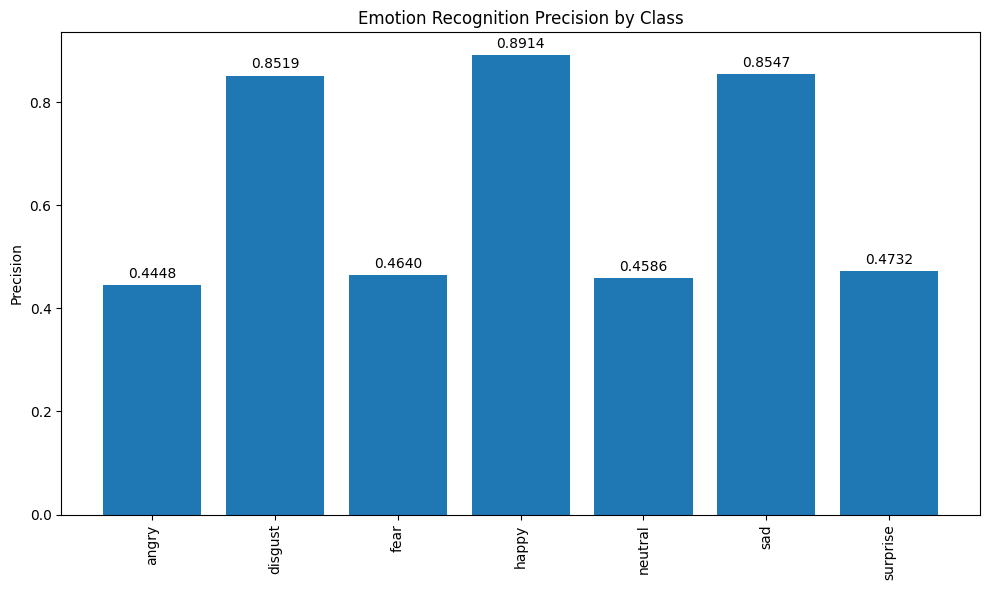


Classification Report:
              precision    recall  f1-score   support

       angry       0.44      0.61      0.51       938
     disgust       0.85      0.39      0.53       118
        fear       0.46      0.29      0.36       994
       happy       0.89      0.71      0.79      1797
     neutral       0.46      0.51      0.48      1309
         sad       0.85      0.59      0.70       838
    surprise       0.47      0.69      0.56      1273

    accuracy                           0.58      7267
   macro avg       0.63      0.54      0.56      7267
weighted avg       0.62      0.58      0.58      7267



In [11]:
import matplotlib.pyplot as plt

# Extract class-wise precision values
precision_values = [class_report[emotion]['precision'] for emotion in emotions]

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_chart = ax.bar(emotions, precision_values)

# Add labels and title
ax.set_ylabel('Precision')
ax.set_title('Emotion Recognition Precision by Class')
ax.set_xticks(range(len(emotions)))
ax.set_xticklabels(emotions, rotation='vertical')

# Add value labels above each bar
for rect in bar_chart:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Display the bar chart
plt.tight_layout()
plt.show()

class_report = classification_report(y_true, y_pred, target_names=emotions)


print("\nClassification Report:")
print(class_report)